<a href="https://colab.research.google.com/github/HwangJae-won/Vaccine_Classification/blob/main/vaccines_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#경고 무시
import warnings
warnings.filterwarnings(action = "ignore")

#동시출력 가능코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [ ]:
X_train=pd.read_csv("/content/drive/MyDrive/CAU 학부 수업자료/4학년 2학기/데이터마이닝2/Data/training_set_features.csv")
y_train=pd.read_csv('/content/drive/MyDrive/CAU 학부 수업자료/4학년 2학기/데이터마이닝2/Data/training_set_labels.csv')

X,y가 따로 있는 데이터였음

In [ ]:
X_train.head()
y_train.head() #h1n1 백신을 맞았는지 #계절별 백신을 맞았는지 : multi-label

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [ ]:
#EDA용으로 하나로 합치기
df=pd.merge(X_train, y_train) #respondent_id 기준으로 merge 수행
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
df.drop(["respondent_id"], axis = 1, inplace=True)

분석에 영향 없는 index 변수는 제거

<Axes: xlabel='seasonal_vaccine', ylabel='count'>

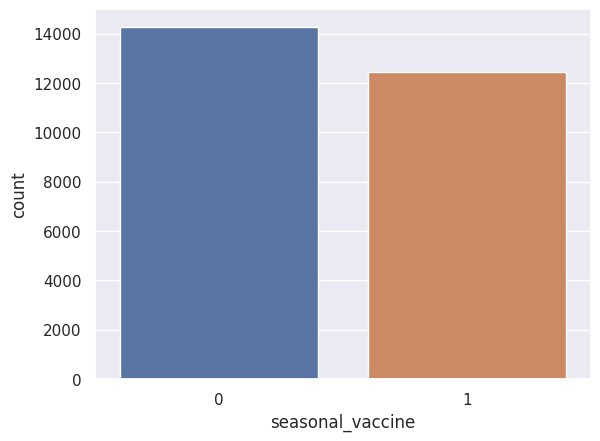

In [ ]:
#target의 분포 확인
sns.set_theme(style = "darkgrid")
sns.countplot(x= df.seasonal_vaccine)

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

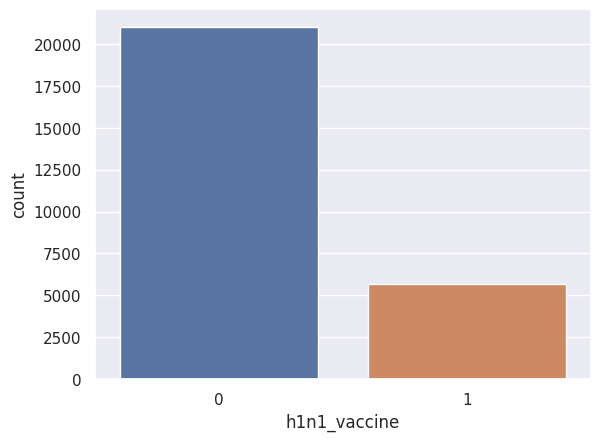

In [ ]:
sns.countplot(x= df.h1n1_vaccine)
#접종 안한 사람이 더 많음: class imbalance 보여주고 있음

In [ ]:
df.h1n1_vaccine.value_counts() /len(df)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

거의 8:2

## Missing value

In [ ]:
df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [ ]:
cat_idx = []
for i in df.columns:
  if df[i].dtype == "object":
    cat_idx.append(i)

In [ ]:
num_idx =list(set(df.columns) - set(cat_idx))

In [ ]:
#fill missing value
df[cat_idx]=df[cat_idx].fillna('unknown')
df[num_idx]=df[num_idx].fillna(-999)
df.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

## Feature engineering

비슷한 변수가 많으므로 연관도 높을 것 같은 변수에 대해 새롭게 변수 생성

In [ ]:
#어른과 아이수를 합쳐 거주인수 변수 생성
df['total_persons']=df.household_adults + df.household_children

In [ ]:
df['h1n1_concern_knowledge'] = df.h1n1_concern + df.h1n1_knowledge

In [ ]:
df["behave_large_gat_outside"]=df.behavioral_large_gatherings + df.behavioral_outside_home

In [ ]:
#행동 변수 추가
behavioral = [col for col in df.columns if "behavioral" in col]
df["behavioral"]= df[behavioral].sum(axis= 1)

['behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face']

In [ ]:
#h1n1에 대한 의견 변수 추가
opinition_h1n1 = [col for col in df.columns if "opinition_h1n1" in col]
df["opinition_h1n1"]= df[opinition_h1n1].sum(axis= 1)

In [ ]:
#sea에 대한 의견 변수 추가
opinion_seas = [col for col in df.columns if "opinion_seas" in col]
df["opinion_seas"]= df[opinion_seas].sum(axis= 1)

In [ ]:
df.head(5)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,total_persons,h1n1_concern_knowledge,behave_large_gat_outside,behavioral,opinition_h1n1,opinion_seas
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,unknown,unknown,0,0,0.0,1.0,1.0,2.0,0.0,5.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,pxcmvdjn,xgwztkwe,0,1,0.0,5.0,1.0,4.0,0.0,10.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-999.0,...,rucpziij,xtkaffoo,0,0,2.0,2.0,0.0,1.0,0.0,7.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,unknown,unknown,0,1,0.0,2.0,1.0,3.0,0.0,10.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,wxleyezf,emcorrxb,0,0,1.0,3.0,1.0,4.0,0.0,8.0


생성한 변수들에 대해 상관계수 확인

In [ ]:
corr =df.corr()
abs(corr['h1n1_vaccine']).sort_values(ascending = False)

h1n1_vaccine                   1.000000
seasonal_vaccine               0.377143
health_insurance               0.224807
doctor_recc_h1n1               0.092520
doctor_recc_seasonal           0.092298
behavioral_antiviral_meds      0.024569
health_worker                  0.014668
child_under_6_months           0.014543
household_adults               0.013299
total_persons                  0.013253
household_children             0.013208
behavioral_touch_face          0.012669
chronic_med_condition          0.012101
behavioral_avoidance           0.011893
behave_large_gat_outside       0.010861
opinion_seas_sick_from_vacc    0.010569
behavioral                     0.009326
behavioral_outside_home        0.009155
opinion_seas                   0.008318
h1n1_concern_knowledge         0.008141
opinion_h1n1_vacc_effective    0.007608
h1n1_concern                   0.007426
behavioral_large_gatherings    0.007352
opinion_seas_risk              0.007351
behavioral_face_mask           0.006070


의견 변수는 기존 변수들 제거

In [ ]:
df.drop(opinion_seas, axis=1, inplace = True)

In [ ]:
abs(corr['h1n1_vaccine']).sort_values(ascending = False)

h1n1_vaccine                   1.000000
seasonal_vaccine               0.377143
health_insurance               0.224807
doctor_recc_h1n1               0.092520
doctor_recc_seasonal           0.092298
behavioral_antiviral_meds      0.024569
health_worker                  0.014668
child_under_6_months           0.014543
household_adults               0.013299
total_persons                  0.013253
household_children             0.013208
behavioral_touch_face          0.012669
chronic_med_condition          0.012101
behavioral_avoidance           0.011893
behave_large_gat_outside       0.010861
opinion_seas_sick_from_vacc    0.010569
behavioral                     0.009326
behavioral_outside_home        0.009155
opinion_seas                   0.008318
h1n1_concern_knowledge         0.008141
opinion_h1n1_vacc_effective    0.007608
h1n1_concern                   0.007426
behavioral_large_gatherings    0.007352
opinion_seas_risk              0.007351
behavioral_face_mask           0.006070


In [ ]:
abs(corr['seasonal_vaccine']).sort_values(ascending = False)

seasonal_vaccine               1.000000
h1n1_vaccine                   0.377143
health_insurance               0.076719
doctor_recc_seasonal           0.067960
doctor_recc_h1n1               0.067652
household_adults               0.040060
total_persons                  0.039764
household_children             0.039466
chronic_med_condition          0.030114
health_worker                  0.029375
child_under_6_months           0.029084
opinion_seas_sick_from_vacc    0.028322
opinion_seas                   0.027224
opinion_seas_vacc_effective    0.024896
opinion_seas_risk              0.024788
opinion_h1n1_sick_from_vacc    0.024502
opinion_h1n1_risk              0.023404
opinion_h1n1_vacc_effective    0.022972
behavioral_antiviral_meds      0.021756
behavioral                     0.009785
behavioral_face_mask           0.005586
behavioral_wash_hands          0.004022
h1n1_concern                   0.003466
behave_large_gat_outside       0.003143
behavioral_large_gatherings    0.002745


## Categorical variable encoding

In [ ]:
cat_idx = []
for i in df.columns:
  if df[i].dtype == "object":
    cat_idx.append(i)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder=LabelEncoder()
encoder = OneHotEncoder()

In [ ]:
#encoding 함수
def encoding(df):
  ## label encoding:multicalss
  df['age_group']=label_encoder.fit_transform(df['age_group'])
  df['education']=label_encoder.fit_transform(df['education'])
  df['income_poverty']=label_encoder.fit_transform(df['income_poverty'])

  df['employment_occupation']=label_encoder.fit_transform(df['employment_occupation'])
  df['hhs_geo_region']=label_encoder.fit_transform(df['hhs_geo_region'])
  df['employment_industry']=label_encoder.fit_transform(df['employment_industry'])

  ##onehot encoding
  def onehot(col):
    encoder.fit(df[[col]])
    onehot = encoder.transform(df[[col]]).toarray()
    onehot = pd.DataFrame(onehot)
    return onehot

  sex_onehot=onehot('sex')
  rent_onehot=onehot('rent_or_own')
  marital_onehot=onehot('marital_status')
  em_sta_onehot=onehot('employment_status')
  race_onehot=onehot('race')
  census_onehot=onehot('census_msa')

  df_onehot = pd.concat([df, sex_onehot,rent_onehot,marital_onehot,em_sta_onehot,race_onehot, census_onehot ], axis = 1)
  df_encoding = df_onehot.drop(columns = ['sex','rent_or_own','marital_status','employment_status','race','census_msa'])

  return df_encoding

In [ ]:
df_encoding=encoding(df)
df_encoding.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,1,2,3,0,1,2,3,0,1,2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_h1n1             26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   